Prime Digits: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
Frequencies Calculated
Performing Fourier Analysis...


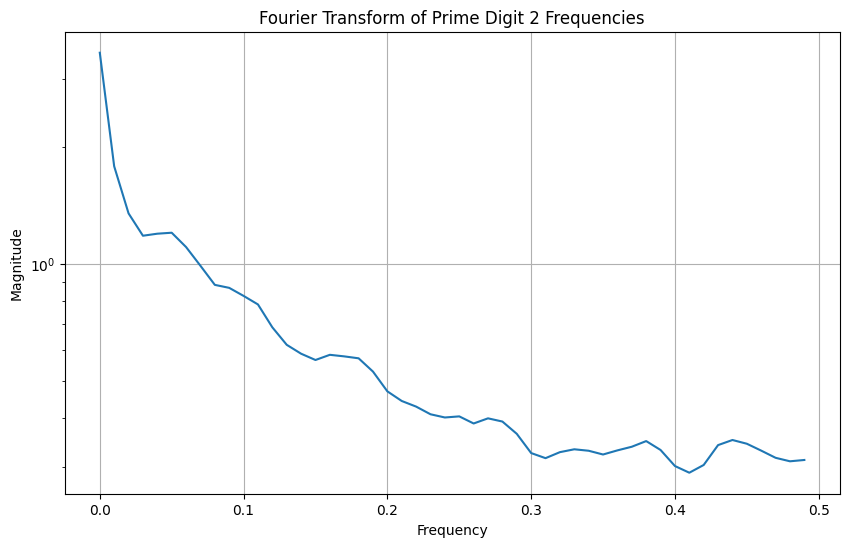

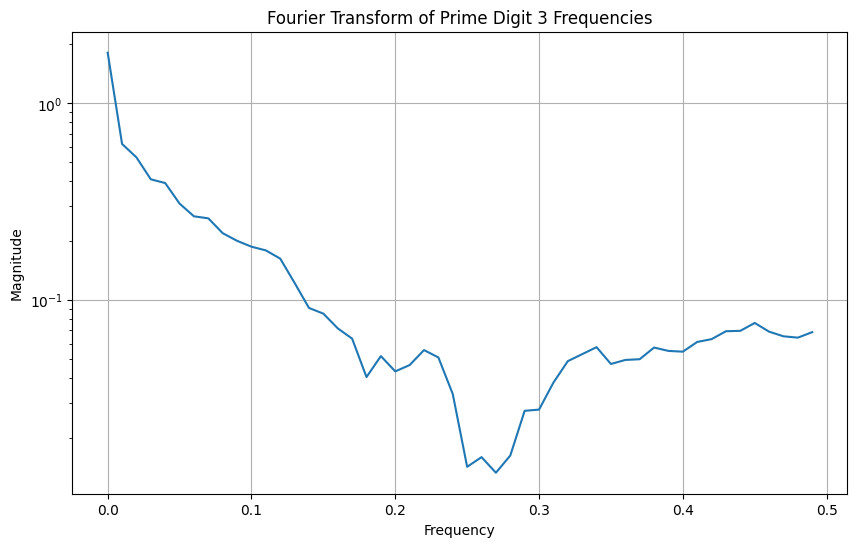

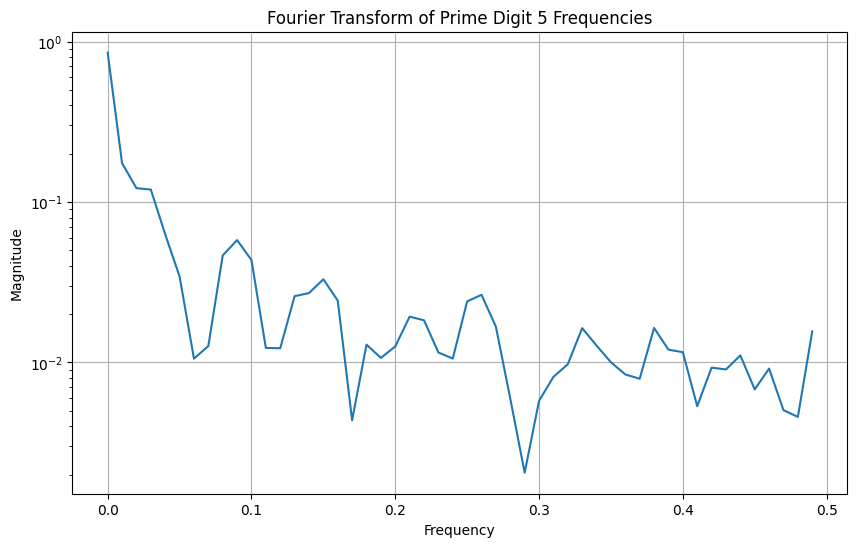

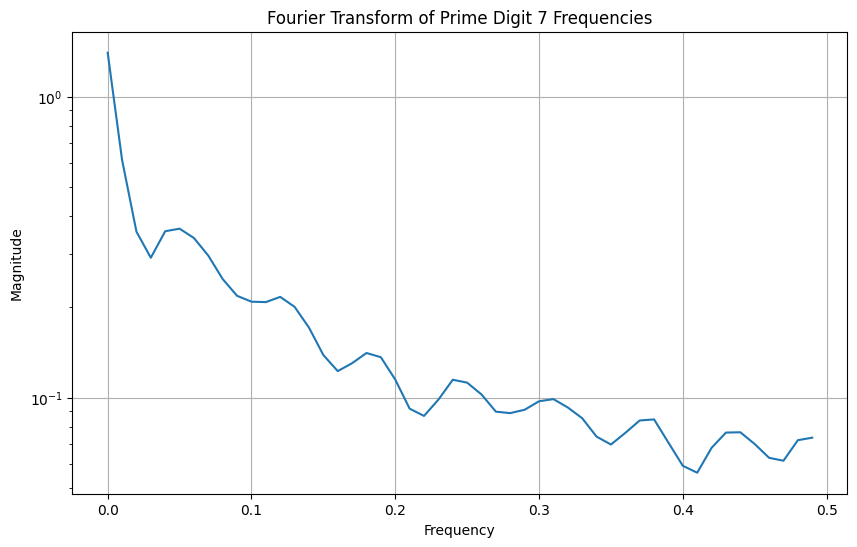

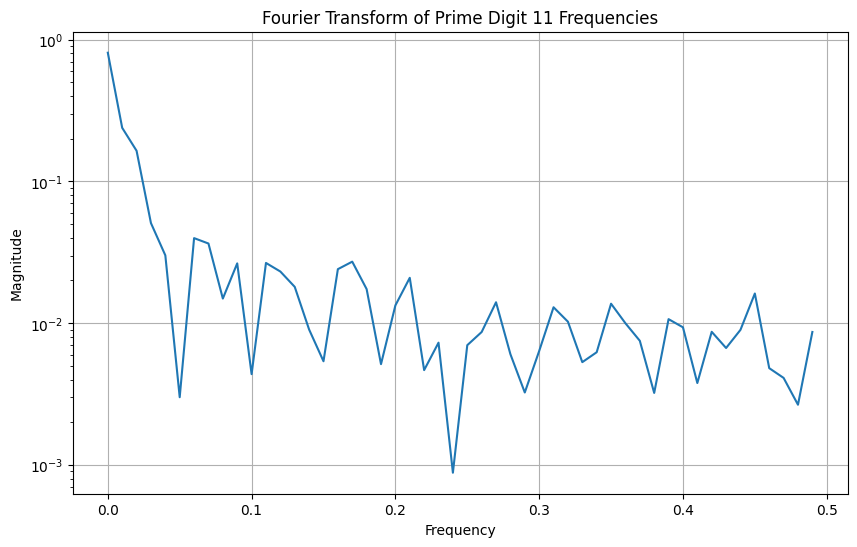

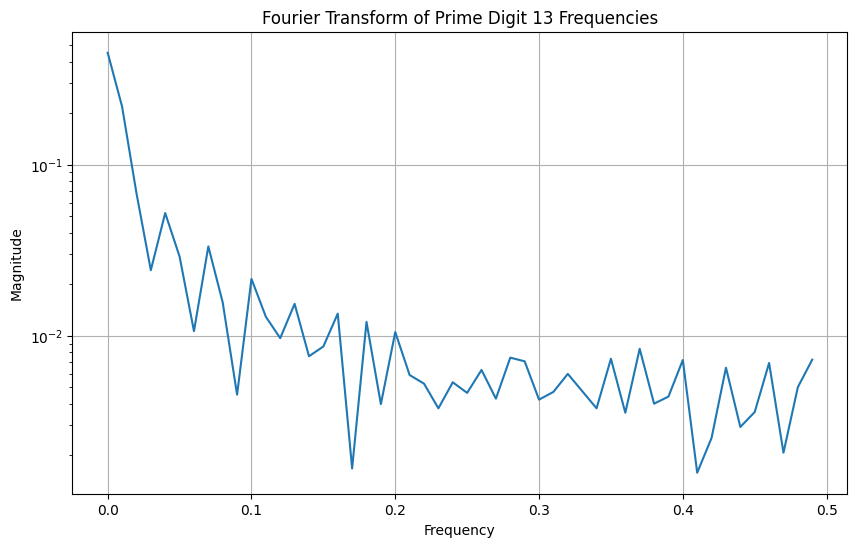

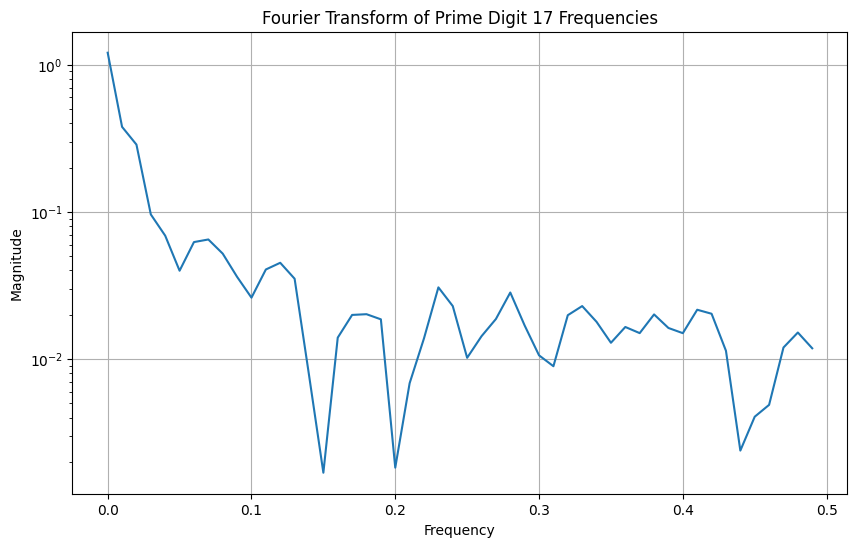

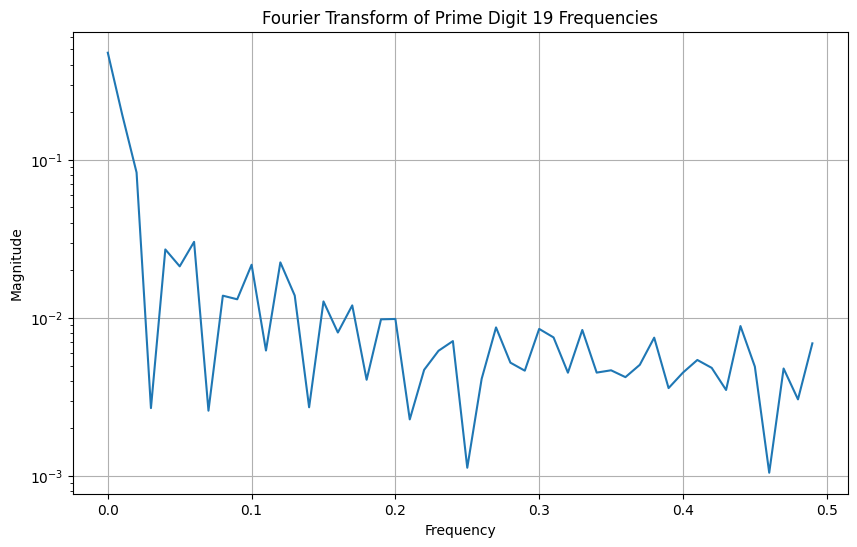

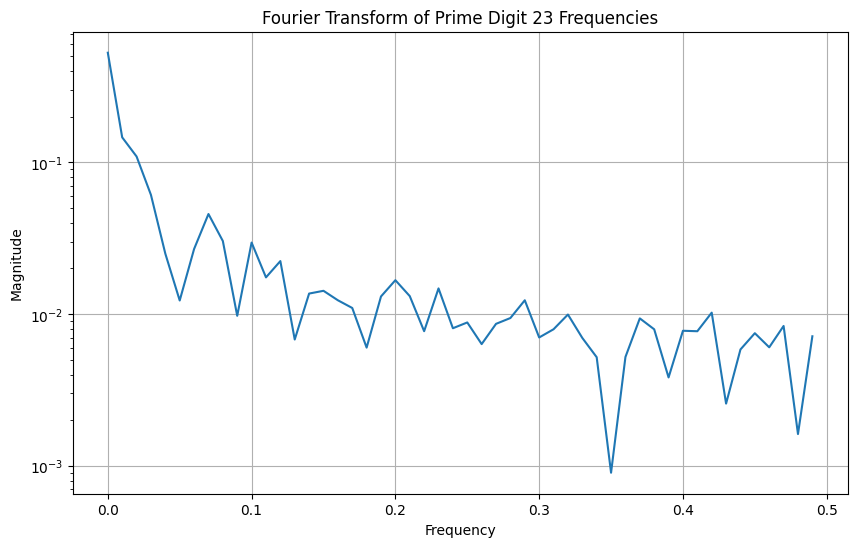

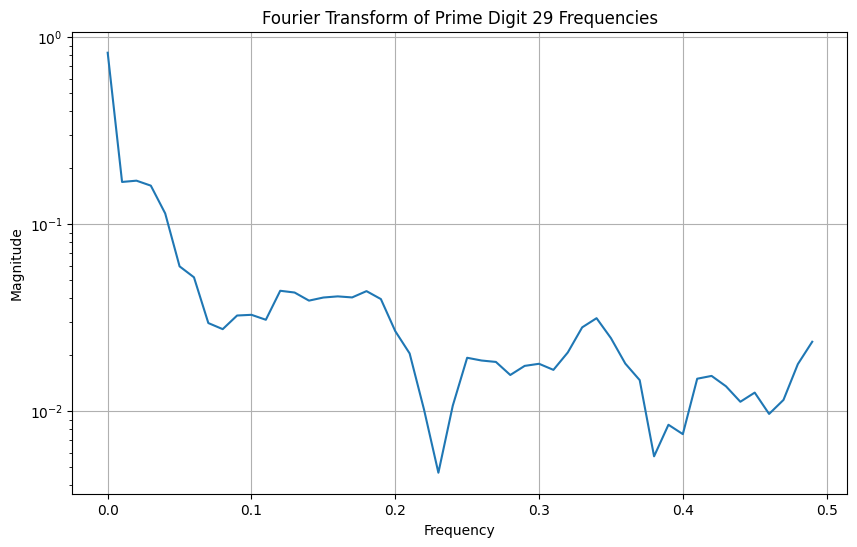

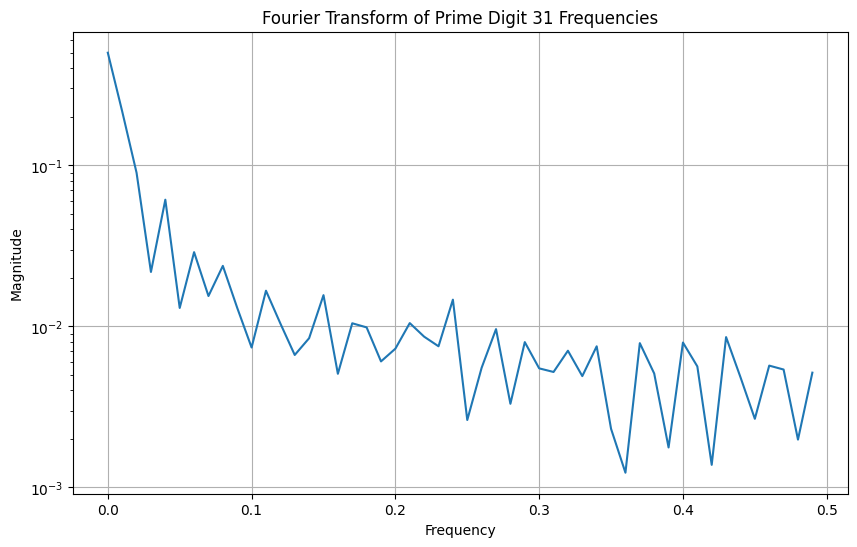

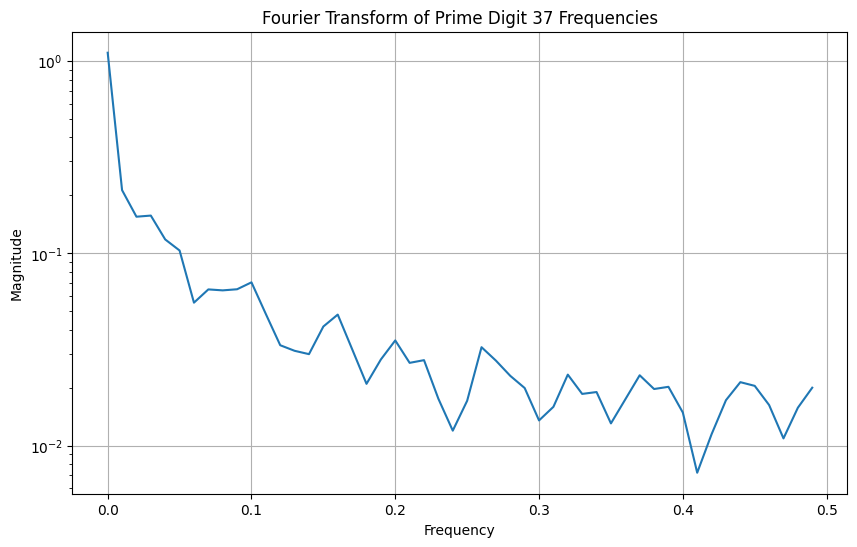

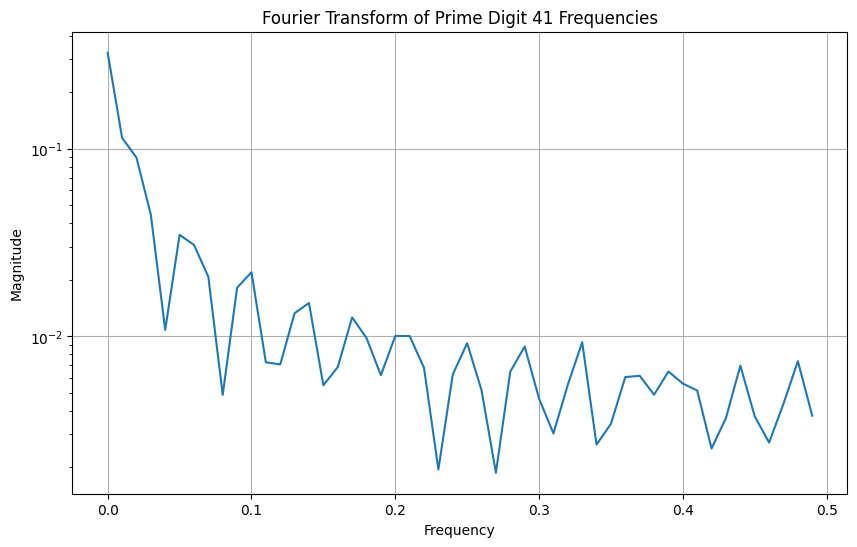

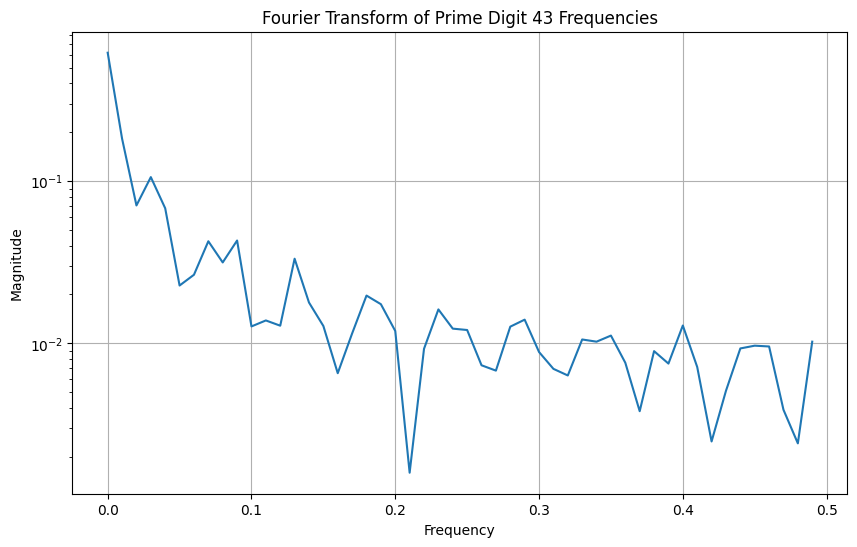

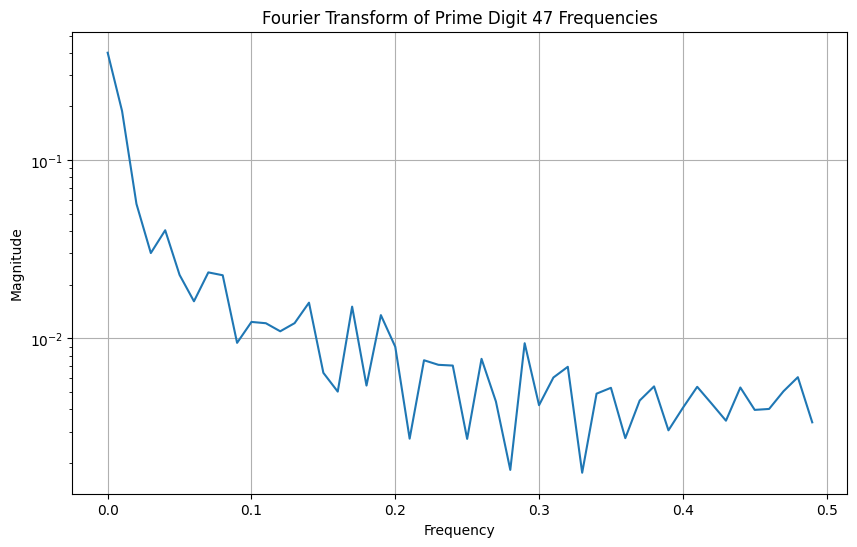

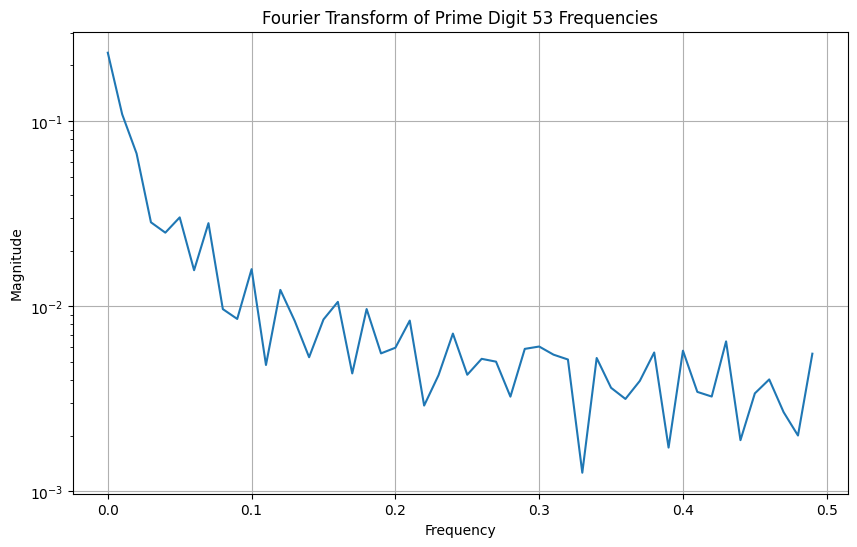

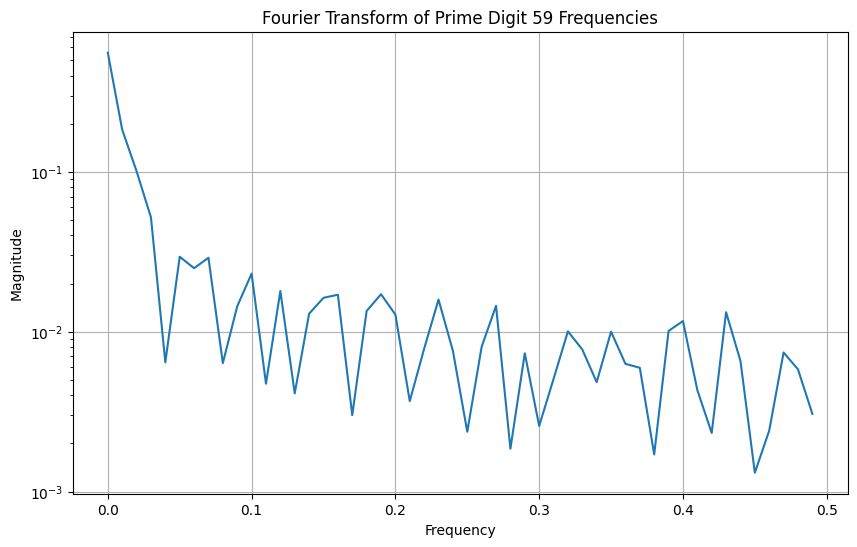

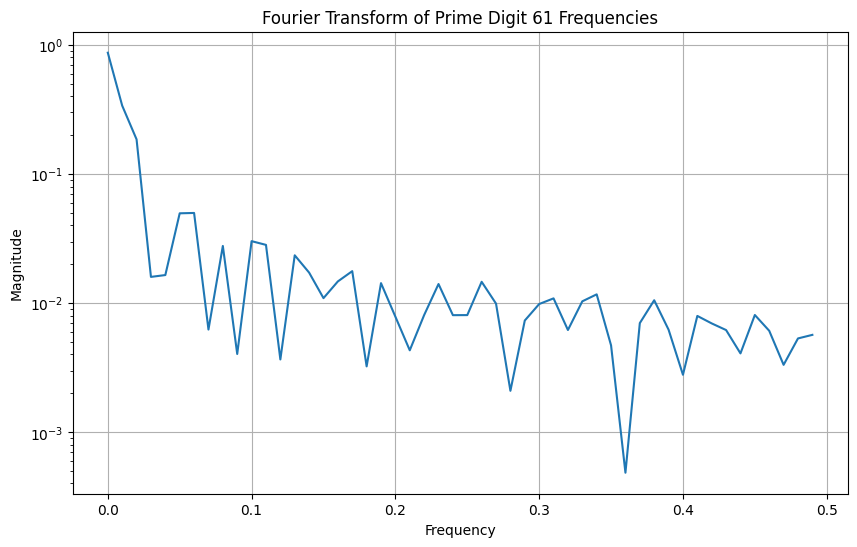

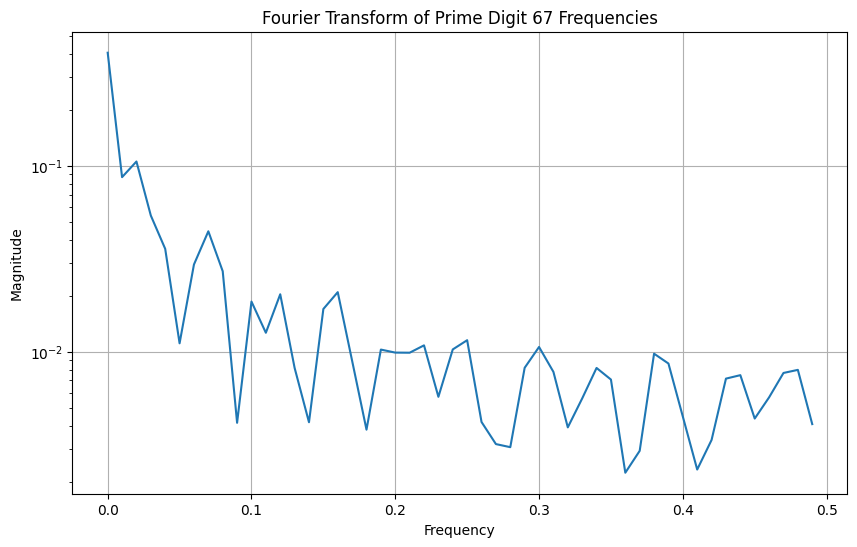

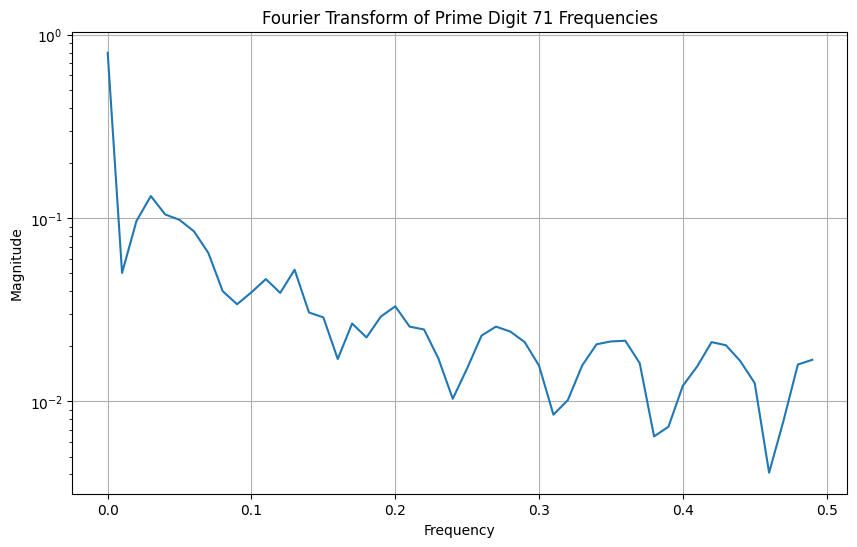

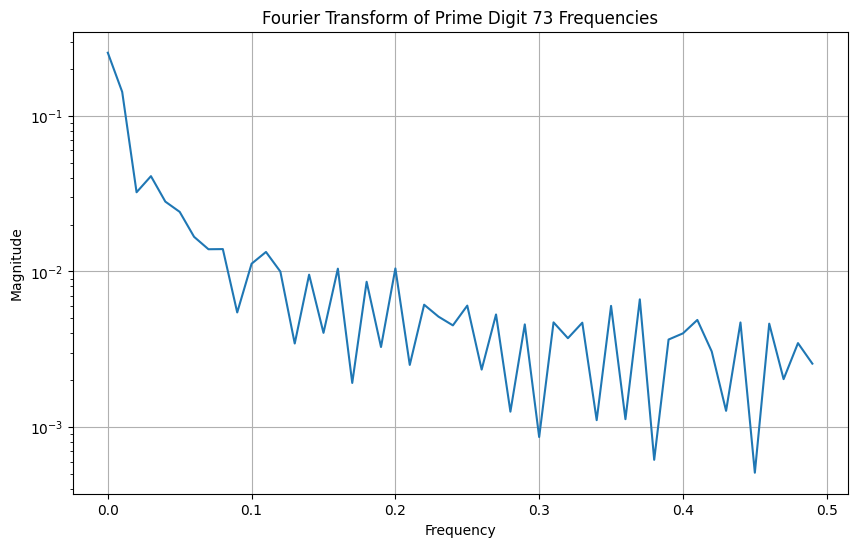

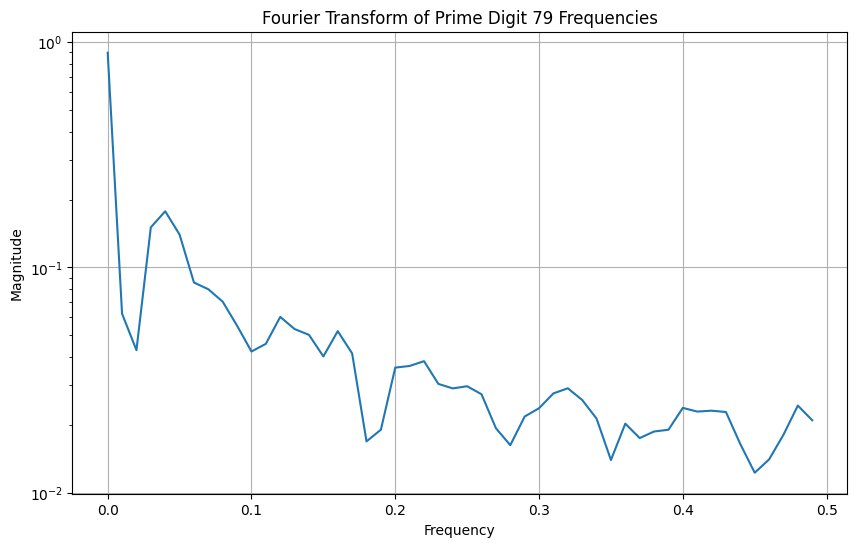

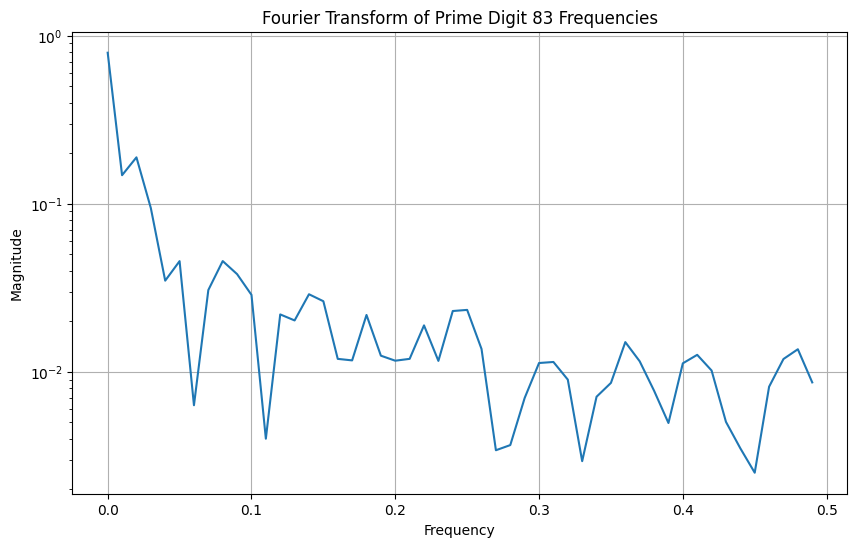

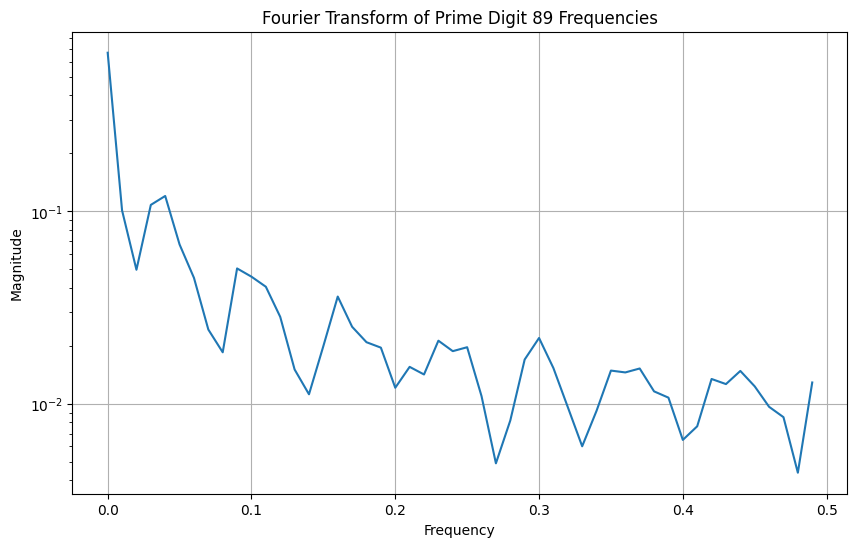

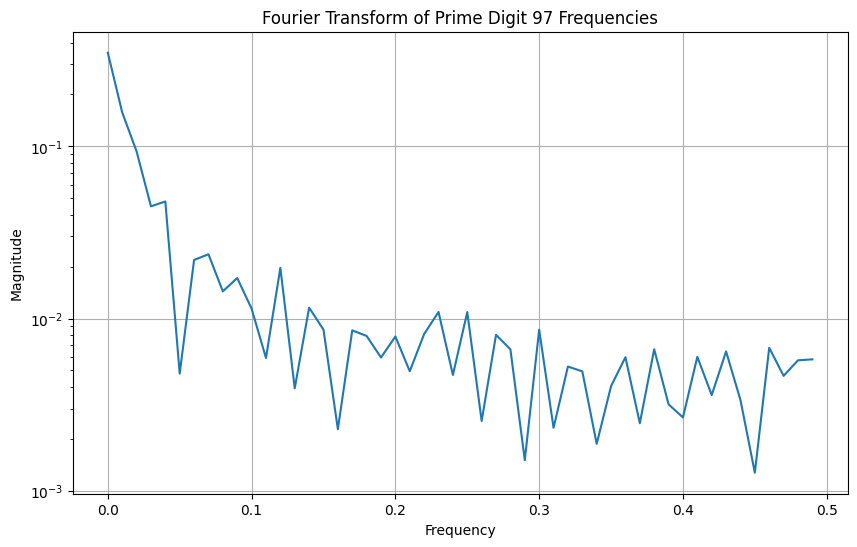

Performing Statistical Analysis...
Chi-Squared Test Statistic: 0.6334799335825692
p-value (Chi-Square): 0.9999999999999984
KS Test Statistic: 0.68
p-value (KS Test): 8.494202585197998e-06


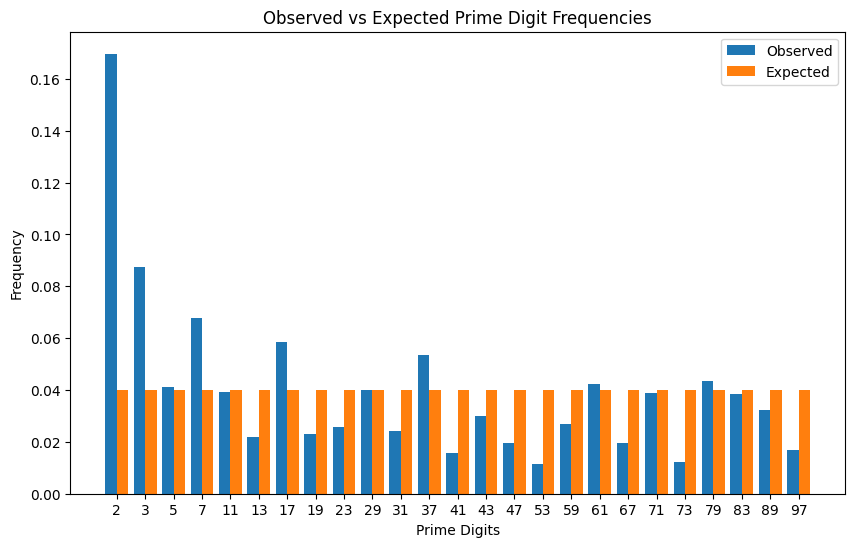

In [1]:
import math
from collections import Counter
from sympy import isprime
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.stats import chisquare, ks_2samp

# Calculate Factorial
def factorial(n):
    return math.factorial(n)

# Convert Number to Base
def convert_to_base(n, base):
    digits = []
    while n:
        digits.append(n % base)
        n //= base
    return digits[::-1]

# Calculate Prime Digit Frequencies in Factorials
def prime_digit_frequency_in_factorials_up_to_n(n, base=10):
    prime_digits = [d for d in range(base) if isprime(d)]
    frequencies = []

    for i in range(1, n + 1):
        digit_counts = Counter()
        total_digits = 0

        for j in range(1, i + 1):
            fact_digits = convert_to_base(factorial(j), base)
            digit_counts.update(fact_digits)
            total_digits += len(fact_digits)

        prime_freq = {digit: digit_counts[digit] / total_digits for digit in prime_digits}
        frequencies.append(prime_freq)

    return frequencies, prime_digits

# Fourier Analysis of Prime Digit Frequencies
def perform_fourier_analysis(frequencies, prime_digits):
    for digit in prime_digits:
        digit_freqs = [freq[digit] for freq in frequencies]
        Y = fft(digit_freqs)  # Perform Fourier Transform
        N = len(Y)
        Y = np.abs(Y[:N//2])  # Take the magnitude of the first half of the FFT

        # Frequency bins
        freq_bins = np.fft.fftfreq(N)[:N//2]

        # Plot the Fourier Transform results
        plt.figure(figsize=(10, 6))
        plt.plot(freq_bins, Y)
        plt.title(f'Fourier Transform of Prime Digit {digit} Frequencies')
        plt.xlabel('Frequency')
        plt.ylabel('Magnitude')
        plt.yscale('log')
        plt.grid(True)
        plt.show()

# Statistical Analysis of Prime Digit Frequencies
def statistical_analysis(frequencies, prime_digits):
    # Calculate observed frequencies across all factorials up to n
    observed_frequencies = {digit: 0 for digit in prime_digits}
    total_counts = 0

    for freq in frequencies:
        for digit in prime_digits:
            observed_frequencies[digit] += freq[digit]
        total_counts += 1

    # Normalize observed frequencies
    observed_list = [observed_frequencies[digit] for digit in prime_digits]
    total_observed = sum(observed_list)
    observed_list = [freq / total_observed for freq in observed_list]

    # Expected frequencies assuming uniform distribution
    expected_list = [1 / len(prime_digits)] * len(prime_digits)

    # Perform chi-squared test
    chi2_stat, p_val_chi = chisquare(observed_list, f_exp=expected_list)

    print("Chi-Squared Test Statistic:", chi2_stat)
    print("p-value (Chi-Square):", p_val_chi)

    # Perform KS test
    ks_stat, p_val_ks = ks_2samp(observed_list, expected_list)

    print(f"KS Test Statistic: {ks_stat}")
    print(f"p-value (KS Test): {p_val_ks}")

    # Plot observed vs expected frequencies
    digits = list(prime_digits)
    plt.figure(figsize=(10, 6))
    x = np.arange(len(digits))

    plt.bar(x - 0.2, observed_list, 0.4, label='Observed')
    plt.bar(x + 0.2, expected_list, 0.4, label='Expected')

    plt.xlabel('Prime Digits')
    plt.ylabel('Frequency')
    plt.xticks(x, digits)
    plt.legend()
    plt.title('Observed vs Expected Prime Digit Frequencies')
    plt.show()

# Main Analysis Function
def main_analysis(n_max=100, base=10):
    # Calculate Frequencies
    frequencies, prime_digits = prime_digit_frequency_in_factorials_up_to_n(n_max, base)
    print("Prime Digits:", prime_digits)
    print("Frequencies Calculated")

    # Perform Fourier Analysis
    print("Performing Fourier Analysis...")
    perform_fourier_analysis(frequencies, prime_digits)

    # Conduct Statistical Analysis
    print("Performing Statistical Analysis...")
    statistical_analysis(frequencies, prime_digits)

# Example usage
if __name__ == "__main__":
    n_max = 100  # Specify the maximum n for factorial calculations
    base = 100    # Specify the base (10 for decimal)

    main_analysis(n_max, base)

In [ ]:
import sympy as sp
from ipywidgets import interact, IntSlider
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter

def factorial(n):
    if n == 0 or n == 1:
        return 1
    fact = 1
    for i in range(2, n + 1):
        fact *= i
    return fact

def convert_to_base(n, base):
    if n == 0:
        return [0]
    digits = []
    while n:
        digits.append(n % base)
        n = n // base
    return digits[::-1]

def count_digit_occurrences(n, base):
    fact_n = factorial(n)
    digits = convert_to_base(fact_n, base)
    counter = Counter(digits)
    return counter

def compute_prime_occurrences(max_prime_idx, base):
    primes = list(sp.primerange(1, max_prime_idx + 1))
    occurrences_matrix = np.zeros((len(primes), base))
    for idx, prime in enumerate(primes):
        occurrence = count_digit_occurrences(prime, base)
        for digit in range(base):
            occurrences_matrix[idx, digit] = occurrence.get(digit, 0)
    return occurrences_matrix, primes

def plot_prime_occurrences(max_prime_idx, base):
    occurrences_matrix, primes = compute_prime_occurrences(max_prime_idx, base)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x_data, y_data = np.meshgrid(range(0, len(primes)), range(base))
    x_data = x_data.flatten()
    y_data = y_data.flatten()
    z_data = occurrences_matrix.T.flatten()

    ax.bar3d(x_data, y_data, np.zeros_like(z_data), 1, 1, z_data, shade=True)

    ax.set_xlabel('Prime Index')
    ax.set_ylabel(f'Base-{base} Digit')
    ax.set_zlabel('Occurrences')

    plt.show()

def interactive_prime_plot():
    interact(
        plot_prime_occurrences,
        max_prime_idx=IntSlider(min=2, max=1000, step=1, value=50, description='Max Prime Index'),
        base=IntSlider(min=2, max=500, step=1, value=10, description='Base')
    )

# Run the interactive prime plot
interactive_prime_plot()